Reference: https://github.com/WNoxchi/Kaukasos/blob/master/FADL1/L3CA_lesson2-image-models.ipynb

In [15]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%ls fastai_lin/

column_data.py   imports.py          learner.py  nlp.py        sgdr.py
conv_learner.py  initializers.py     lm_rnn.py   plots.py      structured.py
core.py          __init__.py         losses.py   __pycache__/  torch_imports.py
dataloader.py    io.py               metrics.py  rnn_reg.py    transforms.py
dataset.py       layer_optimizer.py  model.py    rnn_train.py  utils.py*
images/          layers.py           models/     set_spawn.py  weights/


### Platform Check & Imports

In [1]:
%pwd

'/home/wnixalo/Aersu/GLOC'

In [2]:
from sys import platform
if platform[:3] == 'dar':
    from fastai_osx.imports import *
    from fastai_osx.conv_learner import *
    from fastai_osx.model import *
    from fastai_osx.torch_imports import *
if platform[:3] == 'lin':
    from fastai_lin.imports import *
    from fastai_lin.conv_learner import *
    from fastai_lin.model import *
    from fastai_lin.torch_imports import *

### DataLoader & Learner

In [3]:
PATH = 'data/'
label_csv = f'{PATH}labels.csv'

In [4]:
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [5]:
arch = resnet34
size = 100

In [215]:
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=32, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
# for speed
data.resize(int(size), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [216]:
data.trn_ds.fnames

array(['train/000000.jpg', 'train/000002.jpg', 'train/000003.jpg', ..., 'train/049517.jpg',
       'train/049518.jpg', 'train/049519.jpg'],
      dtype='<U16')

In [224]:
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 793/1026 [01:21<00:23,  9.78it/s, loss=1.79] 

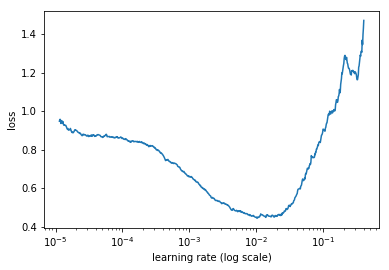

In [225]:
learner.lr_find()
learner.sched.plot()

In [227]:
λr = 5e-3

In [228]:
learner.fit(λr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


  6%|▌         | 62/1026 [00:07<01:48,  8.85it/s, loss=0.854]


  7%|▋         | 67/1026 [00:07<01:47,  8.91it/s, loss=0.809]

  7%|▋         | 69/1026 [00:07<01:47,  8.93it/s, loss=0.792]

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

 15%|█▌        | 157/1026 [00:16<01:30,  9.56it/s, loss=0.492]


KeyboardInterrupt: 

[How to visualize/display a data image in ‘torch.FloatTensor’ type](https://discuss.pytorch.org/t/how-to-visualize-display-a-data-image-in-torch-floattensor-type/7770)

[Plotting numpy arrays as images](https://matplotlib.org/users/image_tutorial.html#plotting-numpy-arrays-as-images)

[ython make RGB image from 3 float32 numpy arrays
](https://stackoverflow.com/questions/26918390/python-make-rgb-image-from-3-float32-numpy-arrays)

[How to create image from numpy float32 array?
](https://stackoverflow.com/questions/38867869/how-to-create-image-from-numpy-float32-array)